## Import Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Reading Dataset
df = pd.read_csv("../data/data.csv")

# displays the top 5 columns of the dataframe
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


## Understanding the Dataset

In [3]:
# no of rows and columns in the dataframe
df.shape

(1059, 8)

In [4]:
# column names of the dataframe
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
# counting null values in each column of the dataframe
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
# checking for any duplicated values
df.duplicated().sum()

976

In [9]:
# count values of categorical column 'Grade'
df.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [10]:
# percentage of split between the categorical values
df.Grade.value_counts(normalize=True)

low       0.405099
medium    0.353163
high      0.241737
Name: Grade, dtype: float64

In [11]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


## Data Visualization

In [12]:
from scipy import stats
from statsmodels.api import qqplot

In [13]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [14]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="Grade", data=df, ax=axes[0][0]
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="Grade", data=df, ax=axes[0][1], split=True
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="Grade", data=df, ax=axes[1][0]
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="Grade", data=df, hue="Grade"
    )  # displays barplot of the given dataframe column respect to 'Grade' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [15]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="Grade", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Grade" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "Grade"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Grade"
    )  # sets the title for the plot as "<column name> respect to Grade"
    plt.show()  # shows the plot

### Grade

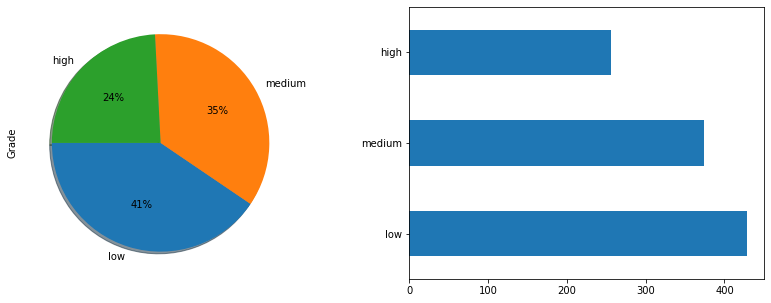

In [16]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5)
)  # sets 1 x 2 subplots with figure size of (14,5)
df.Grade.value_counts().plot.pie(
    autopct="%.0f%%", shadow=True, startangle=180, ax=ax[0]
)  # plots pie chart of Grade column with % percentage
df.Grade.value_counts().plot.barh(
    ax=ax[1]
)  # plots bar chart of Grade column value counts
plt.show()  # shows the plot

### Temprature

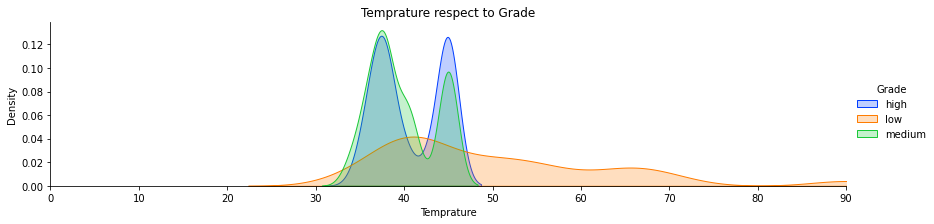

In [17]:
plot_kde("Temprature")

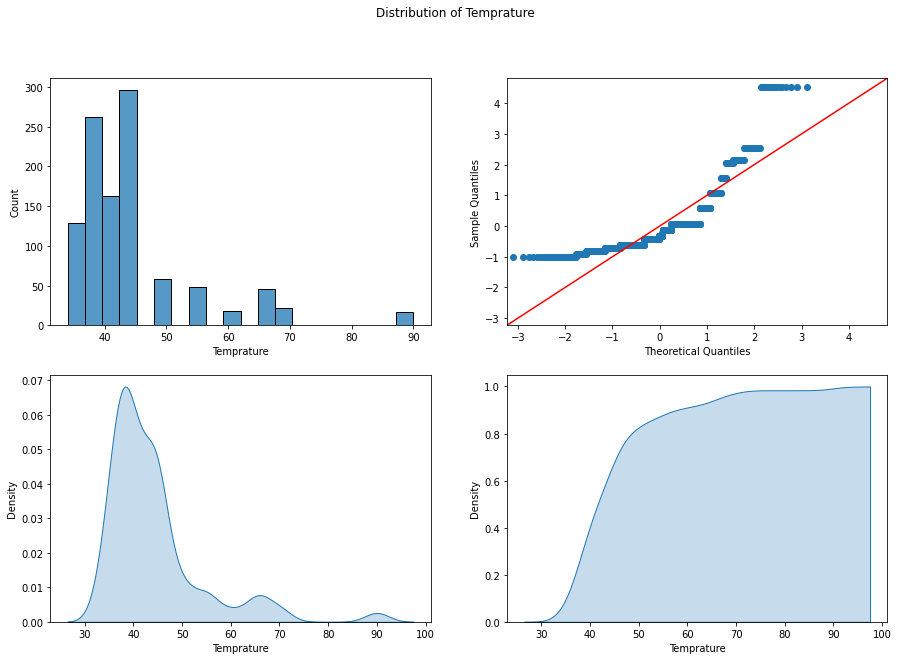

In [18]:
plot_distribution("Temprature")

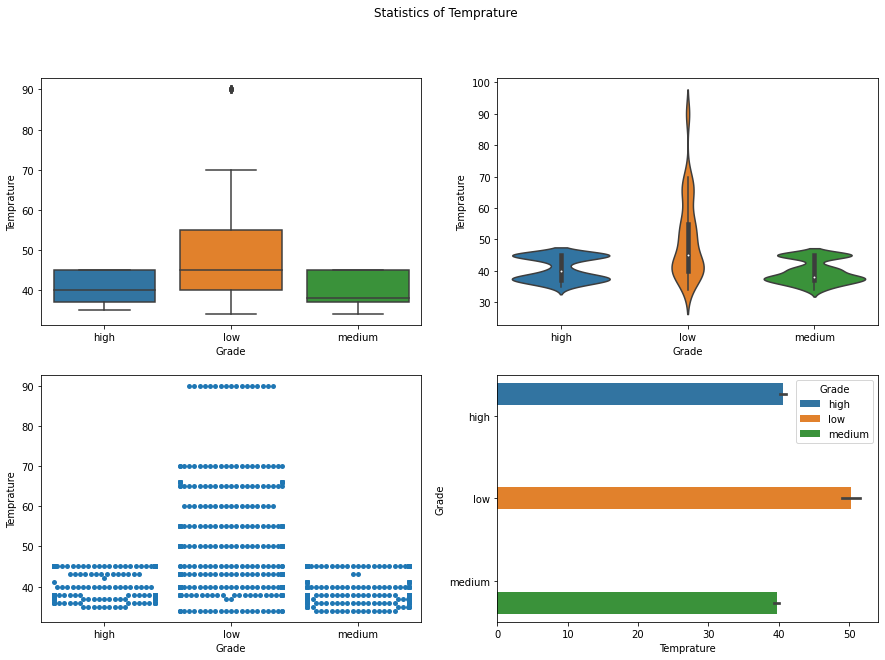

In [19]:
plot_stats("Temprature")

### Pair Plot

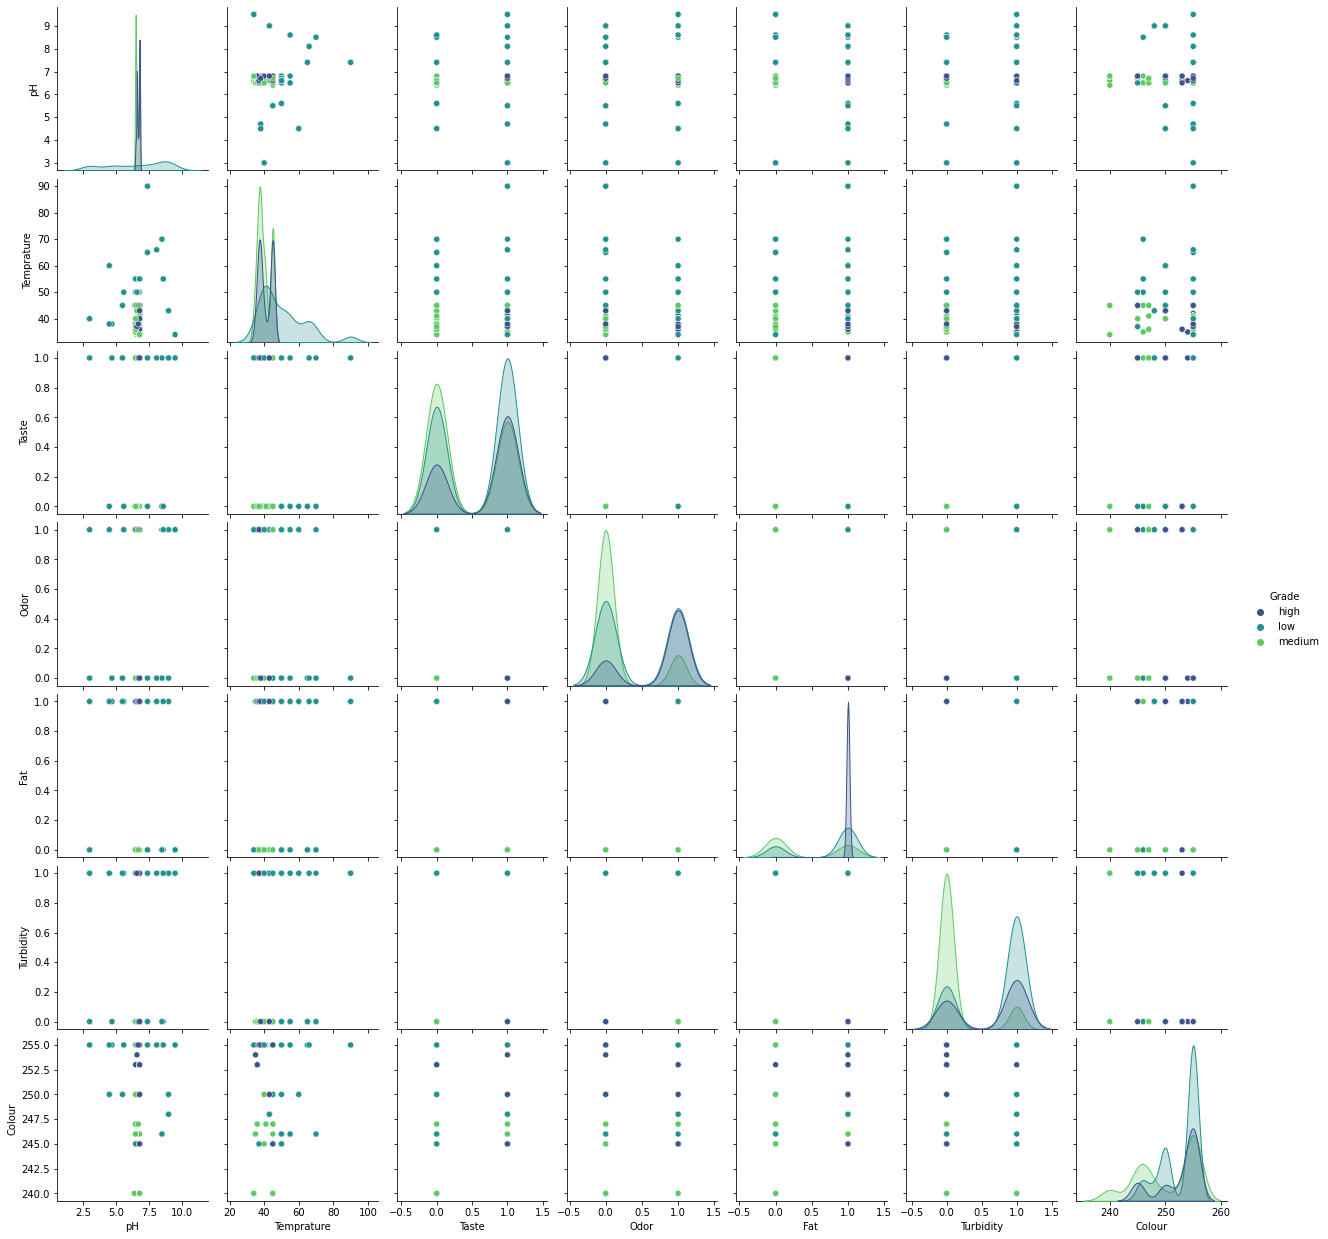

In [20]:
sns.pairplot(
    df,
    hue="Grade",
    palette="viridis",
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

## Feature Engineering

In [21]:
df.Grade.replace(to_replace={"low": 0, "medium": 1, "high": 2}, inplace=True)
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


## Correlation

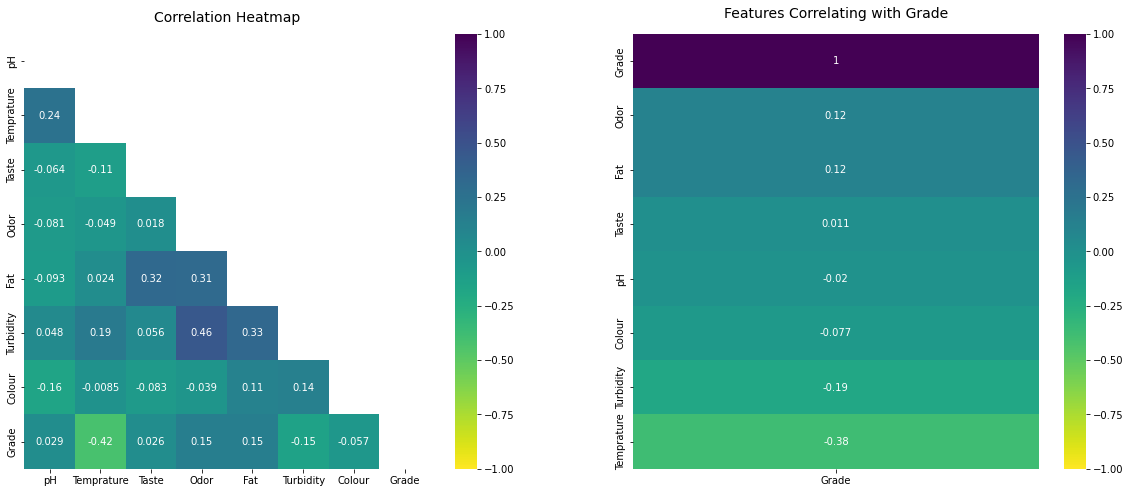

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df.corr(
    method="spearman"
)  # calculate spearman correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="viridis_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["Grade"]].sort_values(by="Grade", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  # create heatmap for features correlating with the dependant varibale 'Grade'
heatmap.set_title(
    "Features Correlating with Grade",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot

## Data Splitting

In [23]:
X = df.drop(["Grade"], axis=1)  # X contains all independant variables
y = df["Grade"]  # Y contains only the dependant variable

In [24]:
X[:5]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [25]:
y[:5]

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

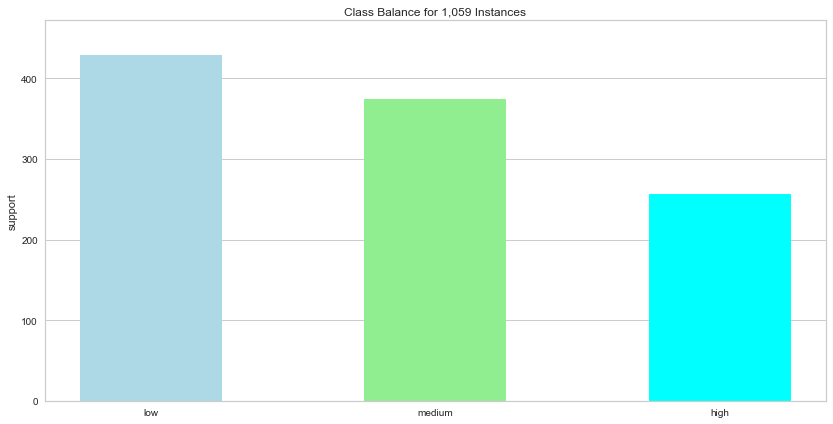

In [26]:
# Class balance between dependant column 'Outcome' values
from yellowbrick.target import ClassBalance

classes = ["low", "medium", "high"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen", "cyan"])
viz.fit(y)
viz.show()
plt.show()

#### Sampling Imbalanced Data

In [27]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

smt = combine.SMOTETomek(
    random_state=14
)  # To make the dependant variable balanced using SMOTETomek method
X, y = smt.fit_resample(X, y)  # resampling the dataset

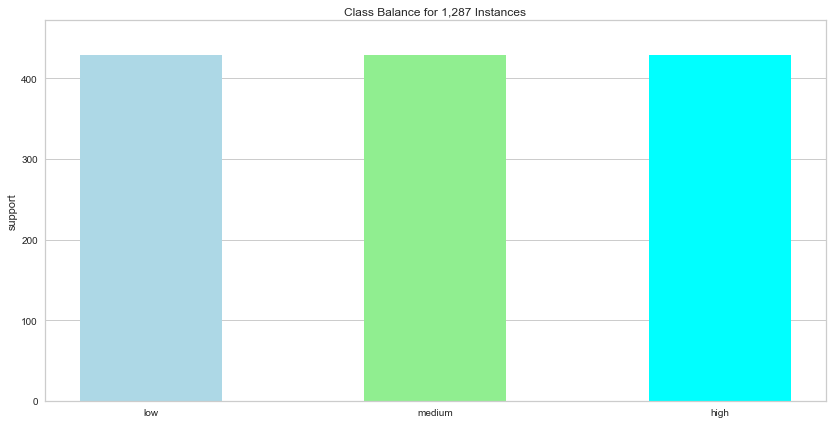

In [28]:
# Class balance between dependant variable is much more balanced now..
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen", "cyan"])
viz.fit(y)
viz.show()
plt.show()

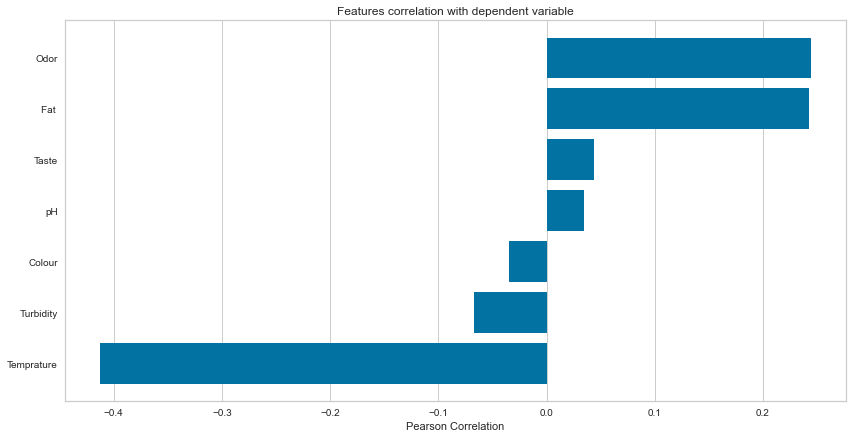

In [29]:
# displays the Features correlation with dependant variable 'Outcome' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="pearson", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

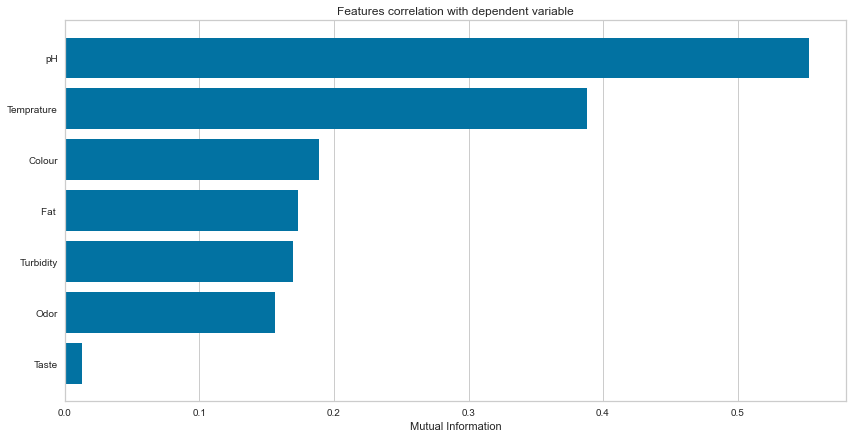

In [30]:
# displays the Features correlation with dependant variable 'Outcome' as a barplot using mutual info classification method
plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

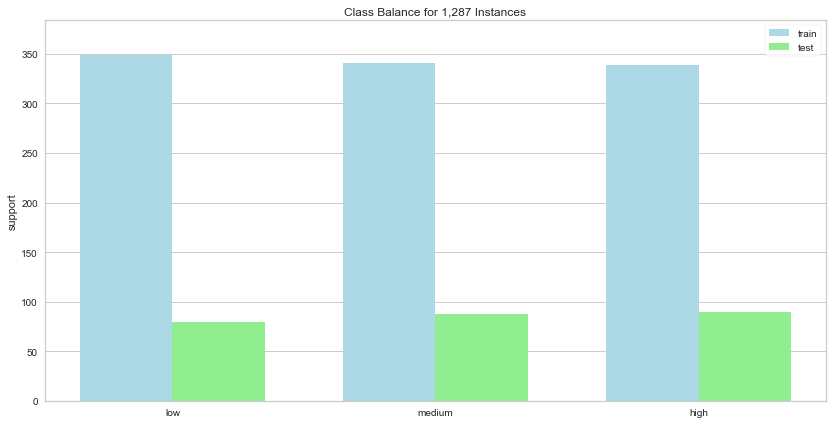

In [32]:
# displays Class balance between training & testing sets
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

## Model Fitting

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [34]:
# fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)

In [35]:
y_pred = rf_clf.predict(X_test)

**Classification Accuracy:**

In [36]:
print(accuracy_score(y_test, y_pred))

0.9961240310077519


**Classification Error:**

In [37]:
print(1 - accuracy_score(y_test, y_pred))

0.003875968992248069


**Class Prediction Error**

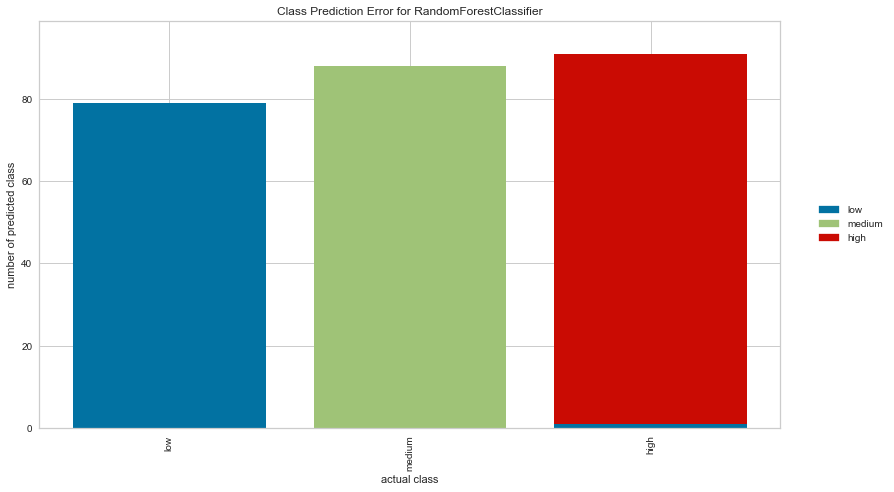

In [38]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(
    rf_clf, X_train, y_train, X_test, y_test, classes=classes
)
visualizer.show()
plt.show()

**ROC Curve**

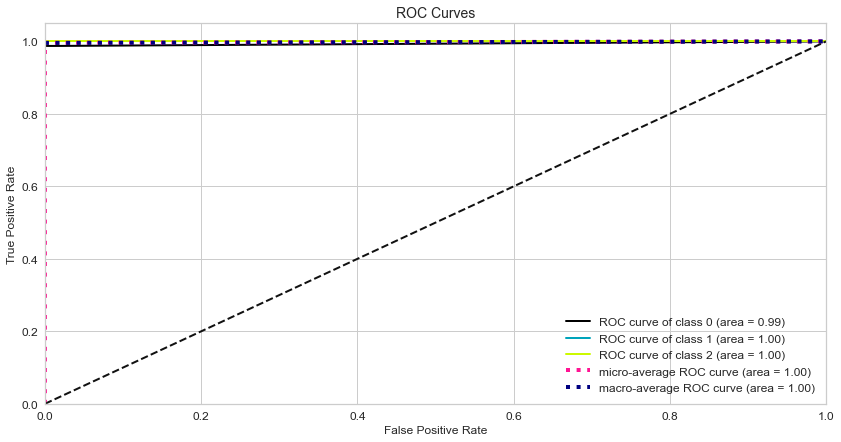

In [39]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)
from scikitplot.estimators import plot_learning_curve

y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Precision Recall Curve**

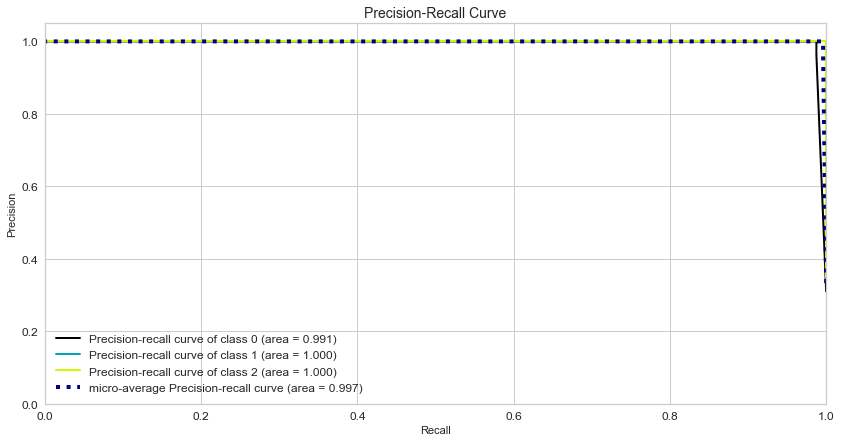

In [40]:
from scikitplot.metrics import plot_precision_recall

plot_precision_recall(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

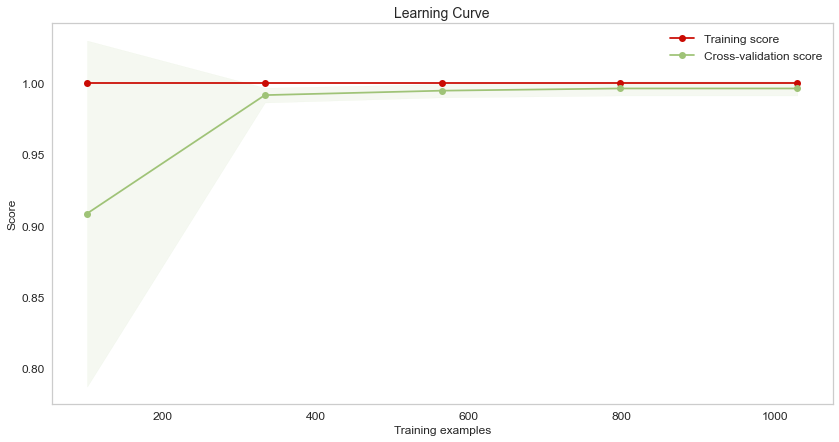

In [41]:
plot_learning_curve(rf_clf, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Confusion Matrix**

In [42]:
confusion_matrix(y_test, y_pred)

array([[79,  0,  1],
       [ 0, 88,  0],
       [ 0,  0, 90]], dtype=int64)

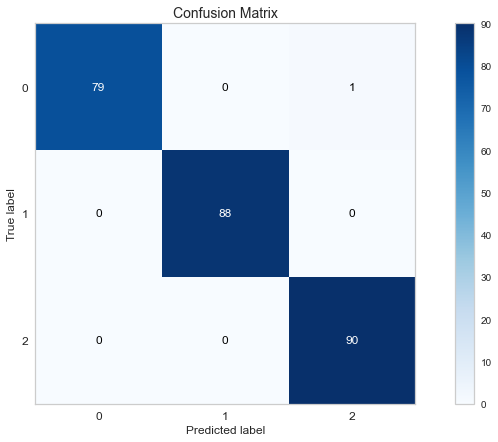

In [43]:
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       1.00      1.00      1.00        88
           2       0.99      1.00      0.99        90

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



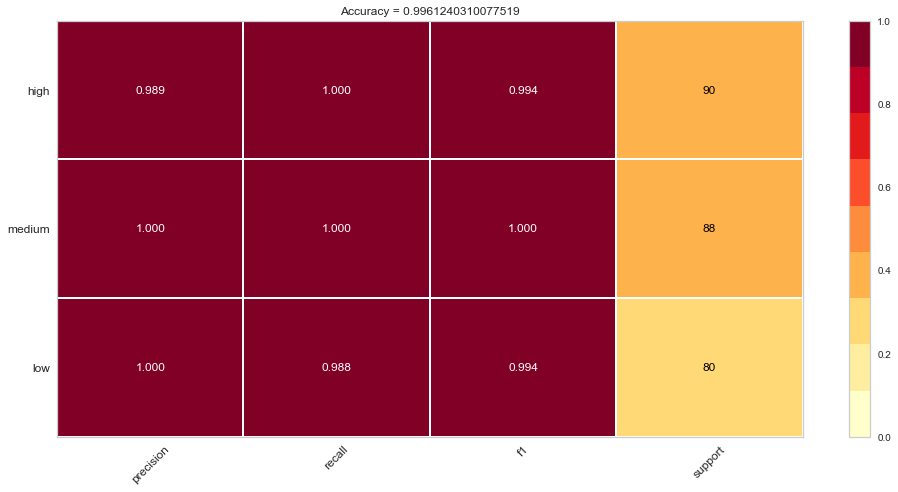

In [45]:
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}"
)
plt.show()

## Saving the Model

In [46]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !
